# Preliminary Exploratory Analysis 

### Introduction

The goal of this capstone project is to develop a predictive model to identify illegal fishing activities by analyzing vessel behavior using AIS (Automatic Identification System) and related datasets. The aim is to provide a tool for policymakers and fishery managers to detect and prevent illegal, unreported, and unregulated (IUU) fishing.

In order to achieve this I t was crucial to obtain a dataset with good quality and comprehensive data on global fishing activities. After thorough research, I discovered an organization called Global Fishing Watch (GFW), which provides data on global fishing activities. GFW's mission is to advance ocean sustainability through increased transparency in fishing activities. They offer a range of datasets that are useful for analyzing and understanding fishing behaviors and identifying potential illegal activities.

Since I took these step at a professional level I encountered a really good challenge on how to build a good dataset. I looked at 13 different Datasets with different many insane amount of csv files each which i had to concatenate and merge to grab sense of data, as well as making sure i was grabbing the right features and making sure the data was not altered or if it was that was altered int the right way.

After analyzing those 13 different datasets from GFW data, I decided to keep 4 

1. Anonymized AIS Training Data:
    The datasets were loaded, and column names were standardized to maintain consistency across datasets.
    Timestamps were converted to datetime objects, ensuring consistent time zones to facilitate accurate time-based analyses.
    Anchorages:

2. Multiple versions of anchorage data were merged into a unified format, consolidating information from various sources.
    Geographical coordinates (latitude and longitude) were standardized to a consistent format to ensure accurate spatial analyses.
    Welch et al. (2022) - Hotspots of Unseen Fishing Vessels:

    The dataset was loaded, and timestamps were converted to datetime objects.
    Relevant features such as the start and end coordinates of AIS disabling events were extracted to analyze the spatial and temporal patterns of these events.

3. Fishing Effort:
    Given the larg e size of this dataset, representative samples were taken to ensure the merging process was manageable without overwhelming computational resources.
    Vessel characteristics and activity indicators were standardized to maintain consistency with other datasets.

4. Welch et al. (2022) - Hotspots of Unseen Fishing Vessels**
   Data on suspected AIS disabling events by commercial fishing vessels between 2017-2019. The dataset identifies when and why fishing vessels intentionally stop broadcasting their position, potentially indicating illegal activities.

After all this research I ended up with only two. Having a version of Welch Unseen Fishing Vessels and the 1.5 Version of the Fishig effort of the dataset that was basically from year 2012 - 2018

Merged Dataset Overview

The final integrated dataset combines features from both the Welch and Fishing Effort datasets. This comprehensive dataset includes the following columns:

Columns Description

- mmsi: Maritime Mobile Service Identity (MMSI) number of the vessel. This is a unique identifier for each vessel.
- flag_x: Flag state (ISO3) of the vessel from the hotspots dataset, indicating the country of registration.
- vessel_class_x: The gear type of the vessel from the hotspots dataset, categorized into various groups.
- registry_vessel_class: The vessel class as per the registry information.
- inferred_vessel_class: The inferred class of the vessel based on machine learning models.
- inferred_vessel_class_score: Confidence score of the inferred vessel class.
- inferred_vessel_class_ag: Inferred vessel class aggregated.
- inferred_vessel_class_ag_score: Confidence score of the aggregated inferred vessel class.
- self_reported_fishing: Boolean indicating whether the vessel self-reported as fishing.
- length_m: Length of the vessel in meters from the hotspots dataset.
- tonnage_gt: Tonnage of the vessel in gross tons from the hotspots dataset.
- engine_power_kw: Engine power of the vessel in kilowatts from the hotspots dataset.
- active_2012: Boolean indicating if the vessel was active in 2012.
- active_2013: Boolean indicating if the vessel was active in 2013.
- active_2014: Boolean indicating if the vessel was active in 2014.
- active_2015: Boolean indicating if the vessel was active in 2015.
- active_2016: Boolean indicating if the vessel was active in 2016.
- active_2017: Boolean indicating if the vessel was active in 2017.
- active_2018: Boolean indicating if the vessel was active in 2018.
- gap_id: Unique identifier for the AIS gap event from the Welch dataset.
- vessel_class_y: The gear type of the vessel from the Welch dataset, categorized into various groups.
- flag_y: Flag state (ISO3) of the vessel from the Welch dataset, indicating the country of registration.
- vessel_length_m: Length of the vessel in meters from the Welch dataset.
- vessel_tonnage_gt: Tonnage of the vessel in gross tons from the Welch dataset.
- gap_start_timestamp: Timestamp when the AIS gap event started.
- gap_start_lat: Latitude of the vessel at the start of the AIS gap event.
- gap_start_lon: Longitude of the vessel at the start of the AIS gap event.
- gap_start_distance_from_shore_m: Distance from shore (meters) at the start of the AIS gap event.
- gap_end_timestamp: Timestamp when the AIS gap event ended.
- gap_end_lat: Latitude of the vessel at the end of the AIS gap event.
- gap_end_lon: Longitude of the vessel at the end of the AIS gap event.
- gap_end_distance_from_shore_m: Distance from shore (meters) at the end of the AIS gap event.
- gap_hours: Duration (hours) of the AIS gap event.

After analyzing and getting into a conclusion, I think i migh have gone the right path and I also look forwar on the posibility of integrating another dataset for more enrichment om prediction Illegal Activities on Fishing vessels.

This is how my data Set looks like and the preliminary EDA

* We import the libraries 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read our dataset
df = pd.read_csv('/Users/rodrigo/Desktop/BrainStation/Capstone/Rodrigo_Pelayo_Capstone_Sprint1/Dataset.csv')

In [5]:
df.head()

,mmsi,flag_x,vessel_class_x,registry_vessel_class,inferred_vessel_class,inferred_vessel_class_score,inferred_vessel_class_ag,inferred_vessel_class_ag_score,self_reported_fishing,length_m,...,vessel_tonnage_gt,gap_start_timestamp,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_timestamp,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours
0,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2018-01-07 02:41:20+00:00,-72.514187,176.007653,173000.0,2018-01-07 18:19:13+00:00,-72.671893,-179.837867,311000.0,15.616667
1,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2019-01-22 22:54:03+00:00,-55.784693,-53.549592,485000.0,2019-03-27 07:33:38+00:00,-37.151973,15.465440,412000.0,1520.650000
2,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2018-01-13 11:53:01+00:00,-72.133440,-179.119307,331000.0,2018-03-19 09:32:42+00:00,-33.867982,18.286645,9000.0,1557.650000
3,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2019-10-02 20:36:01+00:00,-37.622533,27.135627,420000.0,2019-10-22 00:31:20+00:00,-46.526027,137.205307,764000.0,459.916667
4,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2018-12-29 08:24:56+00:00,-70.958027,179.477253,310000.0,2019-01-18 11:23:58+00:00,-55.298267,-58.397520,269000.0,482.983333


In [7]:
df['self_reported_fishing'].value_counts()

self_reported_fishing
True     30577
False    21037
Name: count, dtype: int64

In [9]:
df['mmsi'].unique()

array([224623000, 273219500, 227957000, ..., 224066580, 503555500,
       412200078])

In [ ]:
df

In [4]:
#We print the shape, columns and info
print('Merged hotspots and fishing effort datasets')
print('\n Shape: ')
print(df.shape)
print('\n Columns: ')
print(df.columns)
print('\n info: ')
print(df.info())
print('\n describe: ')
print(df.describe())

Merged hotspots and fishing effort datasets

 Shape: 
(51614, 33)

 Columns: 
Index(['mmsi', 'flag_x', 'vessel_class_x', 'registry_vessel_class',
       'inferred_vessel_class', 'inferred_vessel_class_score',
       'inferred_vessel_class_ag', 'inferred_vessel_class_ag_score',
       'self_reported_fishing', 'length_m', 'tonnage_gt', 'engine_power_kw',
       'active_2012', 'active_2013', 'active_2014', 'active_2015',
       'active_2016', 'active_2017', 'active_2018', 'gap_id', 'vessel_class_y',
       'flag_y', 'vessel_length_m', 'vessel_tonnage_gt', 'gap_start_timestamp',
       'gap_start_lat', 'gap_start_lon', 'gap_start_distance_from_shore_m',
       'gap_end_timestamp', 'gap_end_lat', 'gap_end_lon',
       'gap_end_distance_from_shore_m', 'gap_hours'],
      dtype='object')

 info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51614 entries, 0 to 51613
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                 

We overview the first rows and how does it look like 

In [4]:
df.head()

,mmsi,flag_x,vessel_class_x,registry_vessel_class,inferred_vessel_class,inferred_vessel_class_score,inferred_vessel_class_ag,inferred_vessel_class_ag_score,self_reported_fishing,length_m,...,vessel_tonnage_gt,gap_start_timestamp,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_timestamp,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours
0,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2018-01-07 02:41:20+00:00,-72.514187,176.007653,173000.0,2018-01-07 18:19:13+00:00,-72.671893,-179.837867,311000.0,15.616667
1,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2019-01-22 22:54:03+00:00,-55.784693,-53.549592,485000.0,2019-03-27 07:33:38+00:00,-37.151973,15.465440,412000.0,1520.650000
2,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2018-01-13 11:53:01+00:00,-72.133440,-179.119307,331000.0,2018-03-19 09:32:42+00:00,-33.867982,18.286645,9000.0,1557.650000
3,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2019-10-02 20:36:01+00:00,-37.622533,27.135627,420000.0,2019-10-22 00:31:20+00:00,-46.526027,137.205307,764000.0,459.916667
4,224623000,ESP,fishing,drifting_longlines|pole_and_line,drifting_longlines,0.386465,fishing,0.921337,True,55.0,...,751.086667,2018-12-29 08:24:56+00:00,-70.958027,179.477253,310000.0,2019-01-18 11:23:58+00:00,-55.298267,-58.397520,269000.0,482.983333


In [4]:
# Check for missing values
print("Missing values in the merged dataset:\n", df.isnull().sum())

# Check data types to ensure they are appropriate for analysis
print("Data types in the merged dataset:\n", df.dtypes)


Missing values in the merged dataset:
 mmsi                                  0
flag_x                              363
vessel_class_x                       42
registry_vessel_class              4502
inferred_vessel_class                 0
inferred_vessel_class_score           0
inferred_vessel_class_ag              0
inferred_vessel_class_ag_score        0
self_reported_fishing                 0
length_m                              0
tonnage_gt                            0
engine_power_kw                       0
active_2012                           0
active_2013                           0
active_2014                           0
active_2015                           0
active_2016                           0
active_2017                           0
active_2018                           0
gap_id                                0
vessel_class_y                        0
flag_y                                0
vessel_length_m                       0
vessel_tonnage_gt                     0
g

In [5]:
# Drop rows with missing values in critical columns
df = df.dropna(subset=['flag_x', 'vessel_class_x', 'registry_vessel_class'])

# Verify the shape after cleaning
print("Shape after dropping missing values:", df.shape)


Shape after dropping missing values: (47070, 33)
Missing values in the cleaned dataset:
 mmsi                               0
flag_x                             0
vessel_class_x                     0
registry_vessel_class              0
inferred_vessel_class              0
inferred_vessel_class_score        0
inferred_vessel_class_ag           0
inferred_vessel_class_ag_score     0
self_reported_fishing              0
length_m                           0
tonnage_gt                         0
engine_power_kw                    0
active_2012                        0
active_2013                        0
active_2014                        0
active_2015                        0
active_2016                        0
active_2017                        0
active_2018                        0
gap_id                             0
vessel_class_y                     0
flag_y                             0
vessel_length_m                    0
vessel_tonnage_gt                  0
gap_start_timestamp    

In [6]:
df.duplicated().sum()

0

In [8]:
df.isna().sum(axis = 0)

mmsi                               0
flag_x                             0
vessel_class_x                     0
registry_vessel_class              0
inferred_vessel_class              0
inferred_vessel_class_score        0
inferred_vessel_class_ag           0
inferred_vessel_class_ag_score     0
self_reported_fishing              0
length_m                           0
tonnage_gt                         0
engine_power_kw                    0
active_2012                        0
active_2013                        0
active_2014                        0
active_2015                        0
active_2016                        0
active_2017                        0
active_2018                        0
gap_id                             0
vessel_class_y                     0
flag_y                             0
vessel_length_m                    0
vessel_tonnage_gt                  0
gap_start_timestamp                0
gap_start_lat                      0
gap_start_lon                      0
g

We describe the features

In [10]:
df.describe()

,mmsi,inferred_vessel_class_score,inferred_vessel_class_ag_score,length_m,tonnage_gt,engine_power_kw,vessel_length_m,vessel_tonnage_gt,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours
count,4.707000e+04,47070.000000,47070.000000,47070.000000,47070.000000,47070.000000,47070.000000,47070.000000,47070.000000,47070.000000,4.707000e+04,47070.000000,47070.000000,4.707000e+04,47070.000000
mean,4.089670e+08,0.908760,0.917789,54.317616,905.691058,1495.741448,54.587477,896.598881,0.984007,10.220626,5.185030e+05,0.998154,10.880719,5.042551e+05,102.422060
std,1.106439e+08,0.132783,0.112152,18.827390,727.093906,1017.480627,21.361445,718.592248,32.565504,118.512770,3.516022e+05,32.553957,118.407793,3.603827e+05,367.478936
min,2.018510e+05,0.245787,0.500000,10.660000,12.000000,29.000000,10.660000,12.000000,-76.095333,-179.983000,9.300000e+04,-75.934333,-179.999360,1.000000e+03,12.000000
25%,3.677438e+08,0.858098,0.865686,38.527712,316.000000,708.100643,38.520000,310.000000,-19.828337,-79.806475,2.810000e+05,-19.836898,-79.481539,2.570000e+05,15.750000
50%,4.124406e+08,0.982628,0.983880,56.120000,868.000000,1181.232656,56.500000,861.000000,-1.902166,-16.993068,4.120000e+05,-1.925700,-16.177323,4.090000e+05,24.233333
75%,4.165250e+08,0.999957,0.999960,70.590000,1322.000000,2139.965003,70.260000,1305.000000,32.435910,153.758744,6.650000e+05,32.634344,153.644115,6.540000e+05,71.383333
max,9.585556e+08,1.000000,1.000000,138.618750,9499.000000,9886.911333,255.390000,9499.000000,78.214127,179.993508,2.245000e+06,80.191548,179.993225,2.217000e+06,17215.933333


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47070 entries, 0 to 51613
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   mmsi                             47070 non-null  int64  
 1   flag_x                           47070 non-null  object 
 2   vessel_class_x                   47070 non-null  object 
 3   registry_vessel_class            47070 non-null  object 
 4   inferred_vessel_class            47070 non-null  object 
 5   inferred_vessel_class_score      47070 non-null  float64
 6   inferred_vessel_class_ag         47070 non-null  object 
 7   inferred_vessel_class_ag_score   47070 non-null  float64
 8   self_reported_fishing            47070 non-null  bool   
 9   length_m                         47070 non-null  float64
 10  tonnage_gt                       47070 non-null  float64
 11  engine_power_kw                  47070 non-null  float64
 12  active_2012            

We plot the Histograms of the Numerical columns 

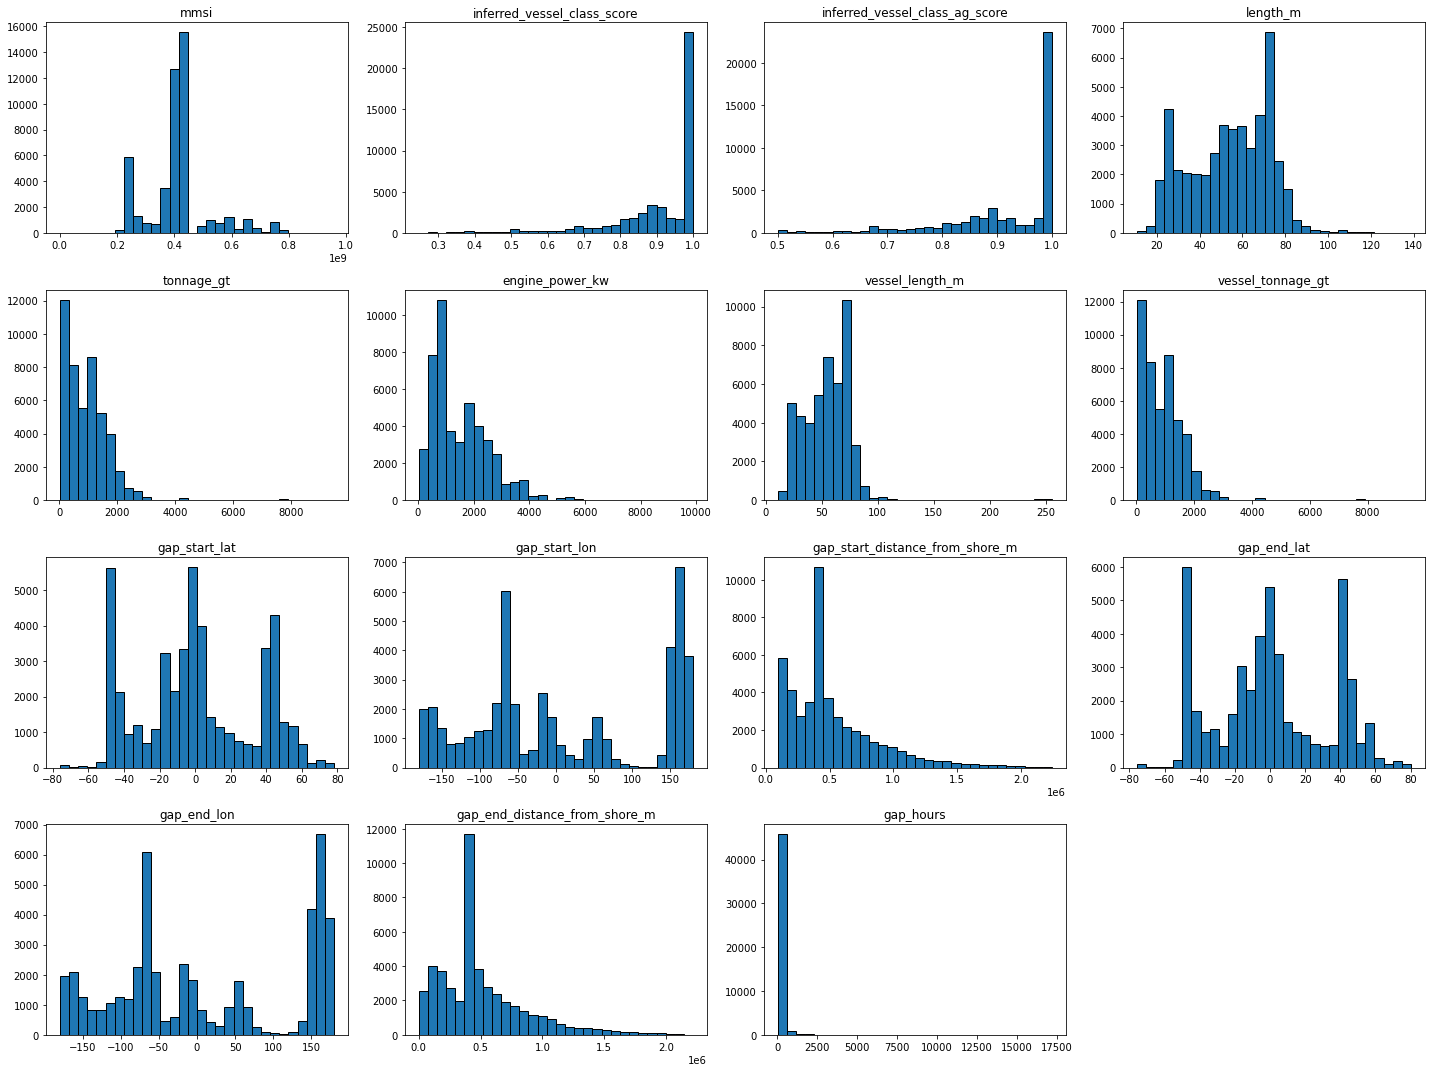

In [11]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    if i < len(axes):  
        axes[i].hist(df[col], bins=30, edgecolor='black')
        axes[i].set_title(col)
    else:
        break  

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

We create a correlation matrix

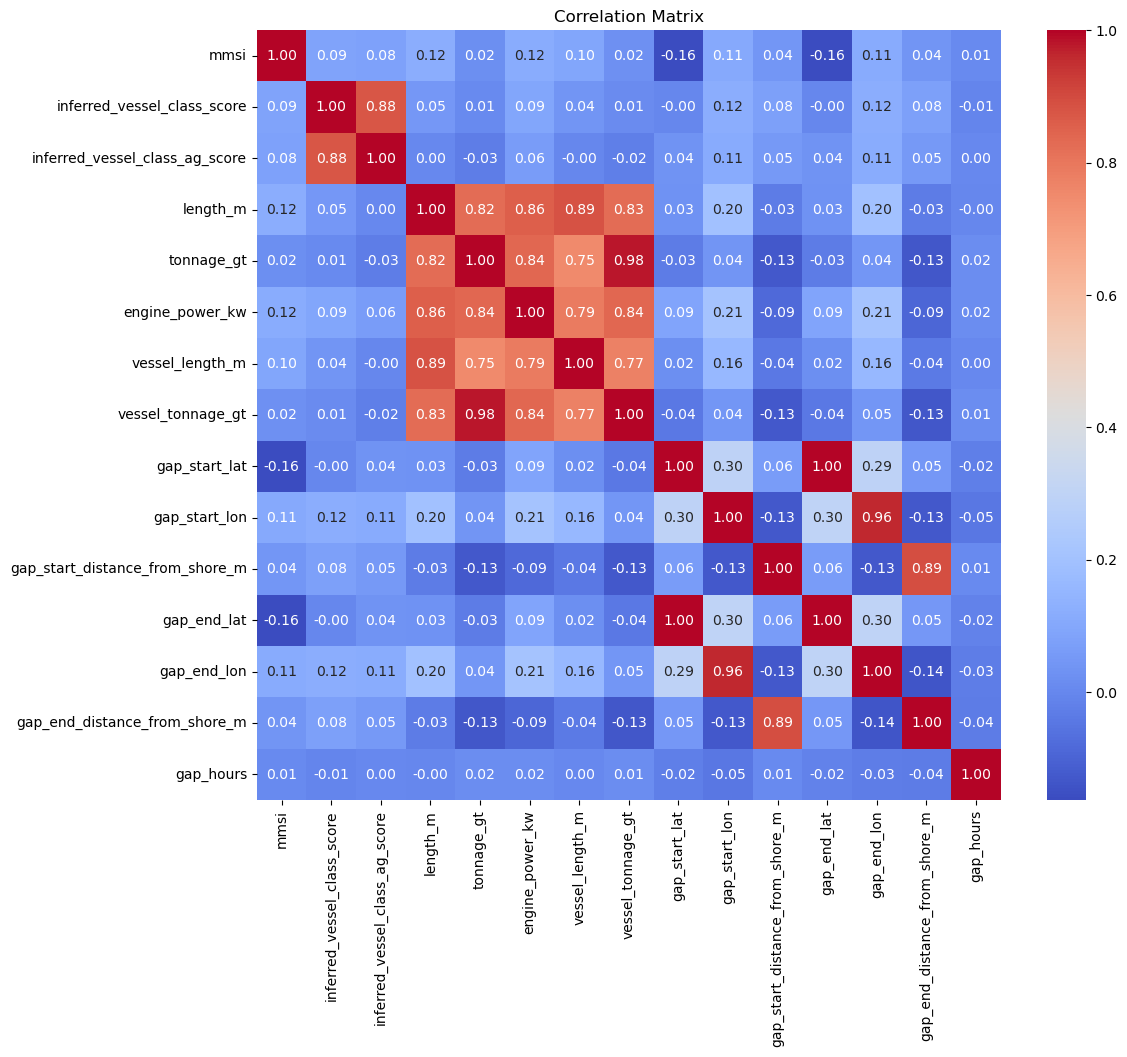

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


We create a sample

In [15]:
df.sample(10)

,mmsi,flag_x,vessel_class_x,registry_vessel_class,inferred_vessel_class,inferred_vessel_class_score,inferred_vessel_class_ag,inferred_vessel_class_ag_score,self_reported_fishing,length_m,...,vessel_tonnage_gt,gap_start_timestamp,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_timestamp,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours
46320,345080025,MEX,tuna_purse_seines,tuna_purse_seines,tuna_purse_seines,0.999999,tuna_purse_seines,0.999999,True,71.164632,...,1512.000000,2019-10-04 15:36:14+00:00,4.607842,-140.187343,1388000.0,2019-10-06 03:17:50+00:00,10.006008,-138.336947,2002000.0,35.683333
36381,416004842,TWN,squid_jigger,fishing,squid_jigger,0.947481,squid_jigger,0.947481,False,74.550000,...,998.000000,2019-10-28 07:44:46+00:00,43.144267,153.638960,415000.0,2019-10-29 20:49:52+00:00,43.645300,154.305173,399000.0,37.083333
42416,303303000,USA,trawlers,trawlers,trawlers,0.956478,trawlers,0.956478,False,34.054878,...,141.558466,2019-11-08 21:40:05+00:00,57.137840,-167.708400,124000.0,2019-11-09 11:36:38+00:00,56.413547,-167.414853,129000.0,13.933333
24154,412329692,CHN,trawlers,fishing,trawlers,0.890701,trawlers,0.890701,True,59.949439,...,1617.000000,2017-12-27 07:17:59+00:00,-45.251068,-60.386697,380000.0,2017-12-27 20:30:33+00:00,-45.353708,-60.501313,382000.0,13.200000
7559,412420315,CHN,squid_jigger,squid_jigger,squid_jigger,0.809603,squid_jigger,0.809603,True,65.790000,...,1305.000000,2018-03-02 04:41:22+00:00,-46.508333,-60.814000,384000.0,2018-03-03 12:04:58+00:00,-46.512100,-60.744907,389000.0,31.383333
36854,416180600,TWN,squid_jigger,fishing,squid_jigger,0.909067,squid_jigger,0.909067,False,72.880000,...,982.000000,2019-07-21 01:35:13+00:00,46.957333,166.284080,791000.0,2019-07-21 15:53:03+00:00,47.313493,167.005627,727000.0,14.283333
10269,227370000,FRA,tuna_purse_seines,NaN,tuna_purse_seines,0.998919,tuna_purse_seines,0.998919,False,47.766437,...,641.494350,2018-10-03 13:35:55+00:00,-4.677457,60.258180,479000.0,2018-10-24 23:25:37+00:00,-4.698048,55.934873,13000.0,513.816667
12966,273819000,RUS,trawlers,trawlers,trawlers,0.607635,trawlers,0.607635,True,54.820000,...,748.000000,2018-09-08 02:57:22+00:00,55.170613,151.948267,230000.0,2018-09-08 17:03:32+00:00,53.687627,151.517547,288000.0,14.100000
47488,441309000,KOR,trawlers,trawlers,trawlers,0.833648,trawlers,0.833648,False,55.680000,...,413.000000,2019-06-10 07:44:36+00:00,-42.450055,-58.173807,387000.0,2019-06-12 21:14:58+00:00,-42.113660,-58.057557,381000.0,61.500000
35464,412420433,CHN,drifting_longlines,drifting_longlines|set_longlines,drifting_longlines,0.900110,drifting_longlines,0.900110,True,40.500000,...,299.000000,2017-08-01 22:27:05+00:00,-18.088323,-131.073195,556000.0,2017-08-02 14:59:57+00:00,-18.128745,-130.293775,637000.0,16.533333


## IMPORTANT CONSIDERATION
This was a quick rapid Preliminary EDA since i had limited time for performing a more developed one having time invested on getting a good data set and creating it myslef. Next EDA will be more detailed and focused. Thanks for the comprenhension


In [16]:
df['mmsi'].duplicated().sum()

46941

In [17]:
df_sample = df.sample(frac=0.25,random_state=45)

In [19]:
df_sample.to_csv('sample.csv',index=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51614 entries, 0 to 51613
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   mmsi                             51614 non-null  int64  
 1   flag_x                           51251 non-null  object 
 2   vessel_class_x                   51572 non-null  object 
 3   registry_vessel_class            47112 non-null  object 
 4   inferred_vessel_class            51614 non-null  object 
 5   inferred_vessel_class_score      51614 non-null  float64
 6   inferred_vessel_class_ag         51614 non-null  object 
 7   inferred_vessel_class_ag_score   51614 non-null  float64
 8   self_reported_fishing            51614 non-null  bool   
 9   length_m                         51614 non-null  float64
 10  tonnage_gt                       51614 non-null  float64
 11  engine_power_kw                  51614 non-null  float64
 12  active_2012       

In [22]:
df['active_2018'].value_counts()

active_2018
True     51161
False      453
Name: count, dtype: int64